In [1]:
#models for predicting game outcomes at 10 minutes;

# Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Store filepath in a variable
path = "master_10_min_data.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
master_df = pd.read_csv(path, encoding="ISO-8859-1")

In [4]:
master_df.columns

Index(['gameid', 'league', 'playerid', 'gamelength', 'team', 'goldat10',
       'oppgoldat10', 'gdat10', 'xpat10', 'oppxpat10', 'xpdat10', 'csat10',
       'oppcsat10', 'csdat10', 'blue_result'],
      dtype='object')

In [5]:
master_df.replace('Blue , 0', 'blue loss', inplace=True)
master_df.replace('Blue , 1', 'blue win', inplace=True)
master_df.replace('Red , 1', 'blue loss', inplace=True)
master_df.replace('Red , 0', 'blue win', inplace=True)

master_df.replace('blue loss', 0, inplace=True)
master_df.replace('blue win', 1, inplace=True)

master_df.head()

,gameid,league,playerid,gamelength,team,goldat10,oppgoldat10,gdat10,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,blue_result
0,980560,LEC,100,30.816667,Fnatic,15304.0,16764.0,-1460.0,18459.0,19689.0,-1230.0,334.0,350.0,-16.0,0
1,980572,LEC,100,38.166667,Splyce,14971.0,15578.0,-607.0,17729.0,18782.0,-1053.0,302.0,292.0,10.0,1
2,980590,LEC,100,31.600000,Vitality,15724.0,16456.0,-732.0,19198.0,19628.0,-430.0,326.0,332.0,-6.0,0
3,990708,LEC,100,24.550000,Rogue,14843.0,15992.0,-1149.0,18476.0,18799.0,-323.0,329.0,316.0,13.0,0
4,990721,LEC,100,27.233333,Origen,15801.0,15690.0,111.0,19635.0,19598.0,37.0,344.0,339.0,5.0,0


In [6]:
X = master_df.drop(['gameid', 'league', 'playerid', 'team', 'blue_result'], axis=1)
y = master_df['blue_result'].values.reshape(-1, 1)
class_names = master_df.blue_result

print(X.shape)
print(y.shape)

(3877, 10)
(3877, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred = classifier.fit(X_train, y_train).predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6663226694186446
Testing Data Score: 0.6463917525773196


In [11]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 1 0 0 1 0 0]
First 10 Actual labels: [[0], [0], [0], [1], [0], [0], [1], [0], [0], [0]]


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, classifier.predict(X_test))

array([[234, 201],
       [142, 393]])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[234 201]
 [142 393]]
Normalized confusion matrix
[[0.54 0.46]
 [0.27 0.73]]


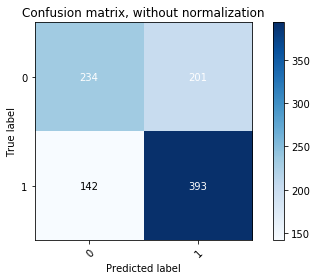

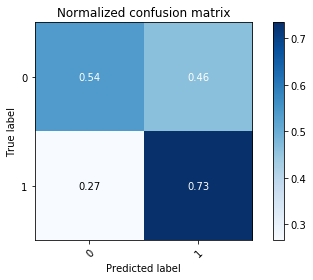

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
### test real games 

# Store filepath in a variable
match_path = "2019_matchups.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
matchups_df = pd.read_csv(match_path, encoding="ISO-8859-1")

matchups_df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1163171,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43674.656782,8.0,2,9.14,100,Blue,...,1186,18601,18413,188,277,310,-33,485,503,-18
1,1163171,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43674.656782,8.0,2,9.14,100,Blue,...,1186,18601,18413,188,277,310,-33,485,503,-18
2,990452,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2019-2,43673.526528,6.0,2,9.14,100,Blue,...,3980,17710,17809,-99,294,297,-3,485,459,26
3,1162715,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43673.643657,8.0,1,9.14,100,Blue,...,-960,18533,18376,157,326,307,19,496,494,2
4,990415,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2019-2,43673.444271,6.0,2,9.14,100,Blue,...,852,18273,18070,203,273,292,-19,405,460,-55


In [28]:
matchups_df['blue_result'] = matchups_df.side.astype(str).str.cat(matchups_df.result.astype(str), sep=" , ")


In [29]:
matchups_df.replace('Blue , 0', 'blue loss', inplace=True)
matchups_df.replace('Blue , 1', 'blue win', inplace=True)
matchups_df.replace('Red , 1', 'blue loss', inplace=True)
matchups_df.replace('Red , 0', 'blue win', inplace=True)

matchups_df.replace('blue loss', 0, inplace=True)
matchups_df.replace('blue win', 1, inplace=True)



In [30]:
real_X = matchups_df[['gamelength', 'goldat10', 'oppgoldat10', 'gdat10', 'xpat10',
       'oppxpat10', 'xpdat10', 'csat10', 'oppcsat10', 'csdat10']]

real_X.head()

,gamelength,goldat10,oppgoldat10,gdat10,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10
0,28.650000,16570,16213,357,18601,18413,188,277,310,-33
1,28.650000,16570,16213,357,18601,18413,188,277,310,-33
2,24.800000,15465,14761,704,17710,17809,-99,294,297,-3
3,34.066667,15434,15355,79,18533,18376,157,326,307,19
4,29.983333,15672,15363,309,18273,18070,203,273,292,-19


In [31]:
X.head()

,gamelength,goldat10,oppgoldat10,gdat10,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10
0,30.816667,15304.0,16764.0,-1460.0,18459.0,19689.0,-1230.0,334.0,350.0,-16.0
1,38.166667,14971.0,15578.0,-607.0,17729.0,18782.0,-1053.0,302.0,292.0,10.0
2,31.600000,15724.0,16456.0,-732.0,19198.0,19628.0,-430.0,326.0,332.0,-6.0
3,24.550000,14843.0,15992.0,-1149.0,18476.0,18799.0,-323.0,329.0,316.0,13.0
4,27.233333,15801.0,15690.0,111.0,19635.0,19598.0,37.0,344.0,339.0,5.0


In [36]:
teams = matchups_df['team']

real_result = matchups_df['result']

predicted_result = classifier.predict(real_X)

results_dict = {
    "blue team": teams,
    "real result": real_result, 
    "predicted result": predicted_result
}

results_df = pd.DataFrame(results_dict)



In [37]:
results_df

,blue team,real result,predicted result
0,Cloud9,1,1
1,Cloud9,1,1
2,G2 Esports,1,1
3,Team Liquid,1,1
4,Excel Esports,1,1
5,Griffin,0,1
6,KT Rolster,0,0
7,Team SoloMid,1,0
8,Golden Guardians,1,1
9,Team Liquid,1,1
